**Car Dataset**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Reading Dataset**

In [2]:
#Reading and displaying the data
data = pd.read_csv('CarPricesPrediction.csv')
data

,ID,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022.0,18107.0,Excellent,19094.75
1,1,Toyota,Silverado,2014.0,NaN,Excellent,27321.10
2,2,Chevrolet,Civic,2016.0,46054.0,Good,23697.30
3,3,Ford,Civic,NaN,34981.0,Excellent,18251.05
4,4,Chevrolet,Civic,2019.0,63565.0,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010.0,149032.0,Excellent,24548.50
996,996,Chevrolet,F-150,2014.0,20608.0,Excellent,26969.70
997,997,Ford,Altima,2016.0,109851.0,Good,20507.55
998,998,Toyota,Silverado,2010.0,NaN,Good,31414.90


### Understanding Dataset

In [3]:
data.shape

(1000, 7)

In [4]:
data.head()

,ID,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022.0,18107.0,Excellent,19094.75
1,1,Toyota,Silverado,2014.0,NaN,Excellent,27321.10
2,2,Chevrolet,Civic,2016.0,46054.0,Good,23697.30
3,3,Ford,Civic,NaN,34981.0,Excellent,18251.05
4,4,Chevrolet,Civic,2019.0,63565.0,Excellent,19821.85


In [5]:
data.tail()

,ID,Make,Model,Year,Mileage,Condition,Price
995,995,Nissan,Camry,2010.0,149032.0,Excellent,24548.50
996,996,Chevrolet,F-150,2014.0,20608.0,Excellent,26969.70
997,997,Ford,Altima,2016.0,109851.0,Good,20507.55
998,998,Toyota,Silverado,2010.0,NaN,Good,31414.90
999,999,Nissan,Silverado,2017.0,128390.0,Excellent,18580.60


In [6]:
data.columns

Index(['ID', 'Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

In [7]:
data.describe()

,ID,Year,Mileage,Price
count,1000.000000,992.000000,984.000000,1000.000000
mean,499.500000,2015.856855,78952.793699,22195.205650
std,288.819436,3.779983,39826.428715,4245.191585
min,0.000000,2010.000000,10079.000000,12613.000000
25%,249.750000,2013.000000,44968.000000,18961.862500
50%,499.500000,2016.000000,78300.000000,22247.875000
75%,749.250000,2019.000000,112366.250000,25510.275000
max,999.000000,2022.000000,149794.000000,31414.900000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   Make       1000 non-null   object 
 2   Model      1000 non-null   object 
 3   Year       992 non-null    float64
 4   Mileage    984 non-null    float64
 5   Condition  1000 non-null   object 
 6   Price      1000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [9]:
data.nunique()

ID           1000
Make            5
Model           5
Year           13
Mileage       977
Condition       3
Price         997
dtype: int64

**Finding number of null values in each column**

In [10]:
data.isnull().sum()

ID            0
Make          0
Model         0
Year          8
Mileage      16
Condition     0
Price         0
dtype: int64

As it can be observed that Year and Mileage has 8 and 16 null values respectively

### Cleaning data

In [11]:
#filling up null values in year with mean of all the values
data['Year'] = data['Year'].fillna(data['Year'].mean()).astype(int)
data

,ID,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107.0,Excellent,19094.75
1,1,Toyota,Silverado,2014,NaN,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054.0,Good,23697.30
3,3,Ford,Civic,2015,34981.0,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565.0,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032.0,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608.0,Excellent,26969.70
997,997,Ford,Altima,2016,109851.0,Good,20507.55
998,998,Toyota,Silverado,2010,NaN,Good,31414.90


In [12]:
#filling up null values in Mileage with mean of all the values
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mean())
data

,ID,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107.000000,Excellent,19094.75
1,1,Toyota,Silverado,2014,78952.793699,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054.000000,Good,23697.30
3,3,Ford,Civic,2015,34981.000000,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565.000000,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032.000000,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608.000000,Excellent,26969.70
997,997,Ford,Altima,2016,109851.000000,Good,20507.55
998,998,Toyota,Silverado,2010,78952.793699,Good,31414.90


In [13]:
data.isnull().sum()

ID           0
Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

### Visualizing Data

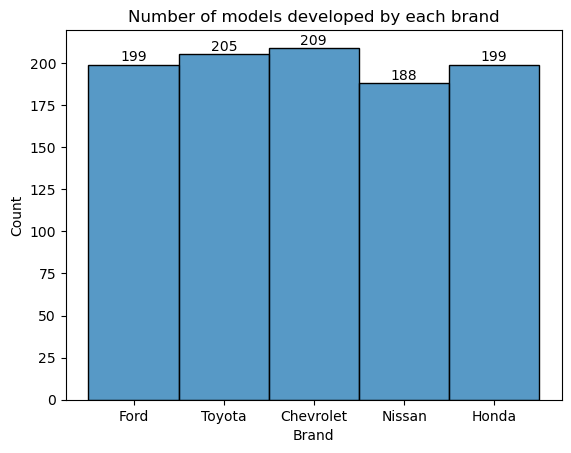

In [14]:
#Number of models developed by each brand
make = list(data['Make'].unique())
num_of_models = {}
for i in make:
    num = len(data[data['Make'] == i])
    num_of_models[i] = num

sns.histplot(data = data, x = 'Make')
plt.title('Number of models developed by each brand')
plt.xlabel('Brand')

plt.text(-0.15, 201, num_of_models['Ford'], fontsize = 10)
plt.text(0.86, 207, num_of_models['Toyota'], fontsize = 10)
plt.text(1.85, 211, num_of_models['Chevrolet'], fontsize = 10)
plt.text(2.85, 190, num_of_models['Nissan'], fontsize = 10)
plt.text(3.85, 201, num_of_models['Honda'], fontsize = 10)

plt.show()

The above histplot represents infomration about the number of models developed by each Car Brand mentioned in the dataset.

Chevrolet has the most models ,i.e., 209, followed by Toyota with 205 models.

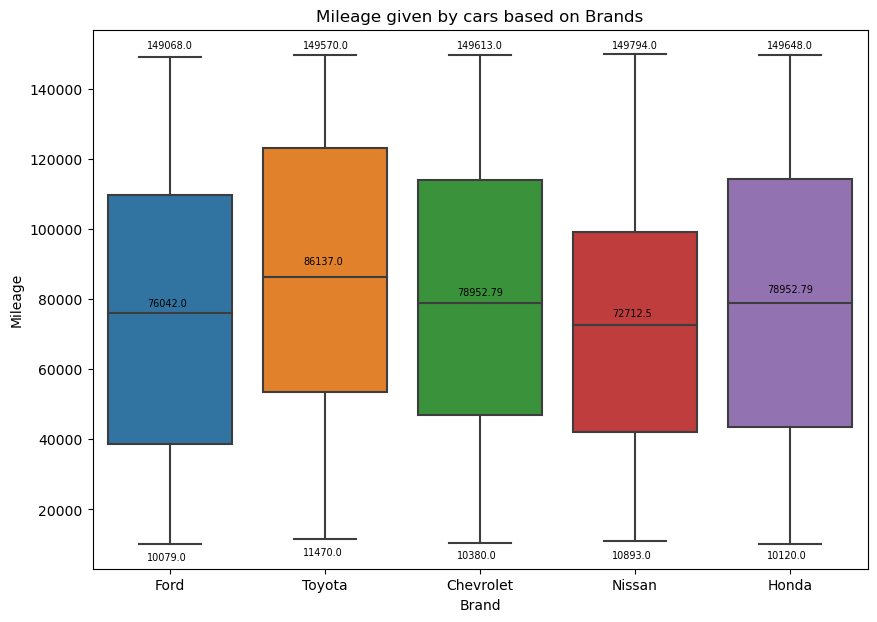

In [19]:
#Mileage given by cars based on Brands

max_mileage_details = {}
for i in make:
    mileage_info = data[data['Make'] == i]['Mileage'].max()
    max_mileage_details[i] = mileage_info

min_mileage_details = {}
for i in make:
    mileage_info = data[data['Make'] == i]['Mileage'].min()
    min_mileage_details[i] = mileage_info

median_mileage_details = {}
for i in make:
    mileage_info = data[data['Make'] == i]['Mileage'].median()
    median_mileage_details[i] = mileage_info

fig = plt.figure(figsize = (10,7))
sns.boxplot(data = data, x = 'Make', y = 'Mileage')
plt.title('Mileage given by cars based on Brands')
plt.xlabel('Brand')
plt.text(-0.15, 151500, max_mileage_details['Ford'], fontsize = 7)
plt.text(0.86, 151500, max_mileage_details['Toyota'], fontsize = 7)
plt.text(1.85, 151500, max_mileage_details['Chevrolet'], fontsize = 7)
plt.text(2.85, 151500, max_mileage_details['Nissan'], fontsize = 7)
plt.text(3.85, 151500, max_mileage_details['Honda'], fontsize = 7)

plt.text(-0.15, 78000, median_mileage_details['Ford'], fontsize = 7)
plt.text(0.86, 90000, median_mileage_details['Toyota'], fontsize = 7)
plt.text(1.85, 81000, round(median_mileage_details['Chevrolet'],2), fontsize = 7)
plt.text(2.85, 75000, median_mileage_details['Nissan'], fontsize = 7)
plt.text(3.85, 82000, round(median_mileage_details['Honda'],2), fontsize = 7)

plt.text(-0.15, 5500, min_mileage_details['Ford'], fontsize = 7)
plt.text(0.86, 7000, min_mileage_details['Toyota'], fontsize = 7)
plt.text(1.85, 6000, min_mileage_details['Chevrolet'], fontsize = 7)
plt.text(2.85, 6000, min_mileage_details['Nissan'], fontsize = 7)
plt.text(3.85, 6000, min_mileage_details['Honda'], fontsize = 7)
plt.show()

The above boxplot represents the mileage information with respect to the Car Brands mentioned in the dataset.

Nissan has the highest mileage, i.e., around 149794.

Ford has the lowest mileage, i.e., around 10079.

It is observed that Toyota provides Cars with comparatively higher mileage frequencies.

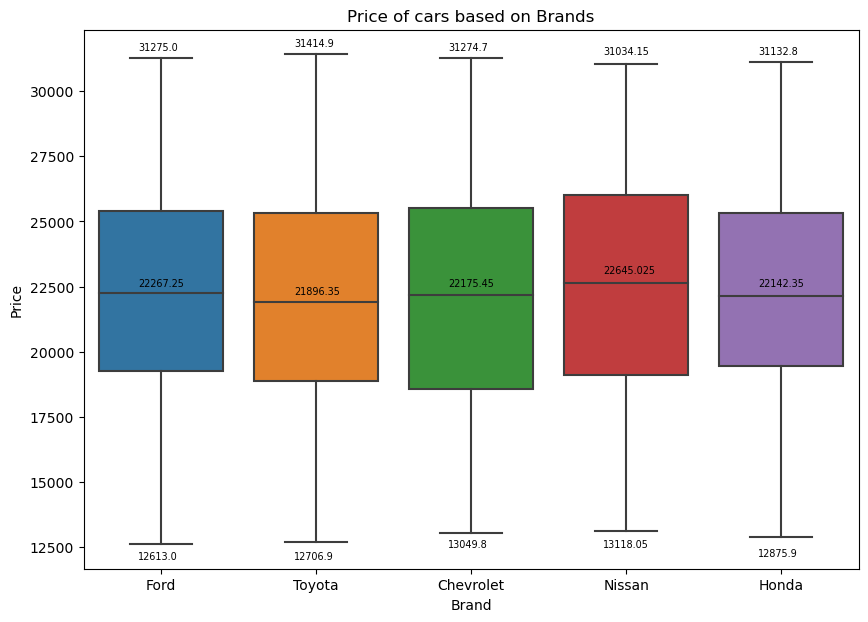

In [17]:
#Price of cars based on Brands

max_price_details = {}
for i in make:
    price_info = data[data['Make'] == i]['Price'].max()
    max_price_details[i] = price_info

min_price_details = {}
for i in make:
    price_info = data[data['Make'] == i]['Price'].min()
    min_price_details[i] = price_info

median_price_details = {}
for i in make:
    price_info = data[data['Make'] == i]['Price'].median()
    median_price_details[i] = price_info

fig = plt.figure(figsize = (10,7))
sns.boxplot(data = data, x = 'Make', y = 'Price')
plt.title('Price of cars based on Brands')
plt.xlabel('Brand')

plt.text(-0.15, 31550, max_price_details['Ford'], fontsize = 7)
plt.text(0.86, 31700, max_price_details['Toyota'], fontsize = 7)
plt.text(1.85, 31550, max_price_details['Chevrolet'], fontsize = 7)
plt.text(2.85, 31400, max_price_details['Nissan'], fontsize = 7)
plt.text(3.85, 31400, max_price_details['Honda'], fontsize = 7)

plt.text(-0.15, 22500, median_price_details['Ford'], fontsize = 7)
plt.text(0.86, 22200, median_price_details['Toyota'], fontsize = 7)
plt.text(1.85, 22500, median_price_details['Chevrolet'], fontsize = 7)
plt.text(2.85, 23000, median_price_details['Nissan'], fontsize = 7)
plt.text(3.85, 22500, median_price_details['Honda'], fontsize = 7)

plt.text(-0.15, 12050, min_price_details['Ford'], fontsize = 7)
plt.text(0.86, 12050, min_price_details['Toyota'], fontsize = 7)
plt.text(1.85, 12500, min_price_details['Chevrolet'], fontsize = 7)
plt.text(2.85, 12500, min_price_details['Nissan'], fontsize = 7)
plt.text(3.85, 12150, min_price_details['Honda'], fontsize = 7)
plt.show()

The above boxplot represents information of prices with respect to the Car Brands mentioned in the dataset.

It can be observed that all the Car Brands sell most ot their cars at almost similar price range.

Nissan charges slightly higher than others.

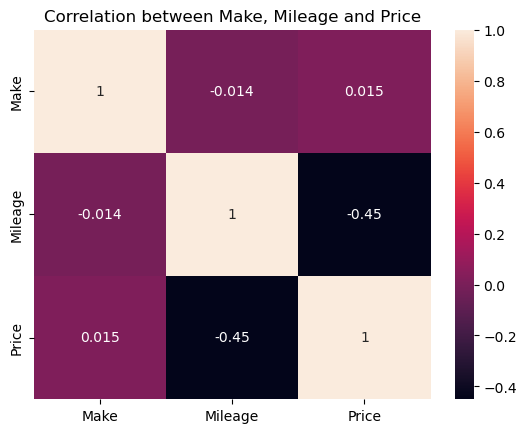

In [22]:
#Correlation between Make, Mileage and Price

data_copy = data.copy()
data_copy['Make'], labels = pd.factorize(data_copy['Make'])
data_copy = data_copy.drop(['ID', 'Year'], axis = 1)
plot = sns.heatmap(data_copy.corr(), annot = True)
plt.title('Correlation between Make, Mileage and Price')
plt.show()

The above correaltion matrix represents the relationship betwen Make (Brand), Mileage and Price of the cars.

It can be observed that Make and Price have a close to zero positive relation amongst them.

Price and Mileage have a negative relation amongst them.

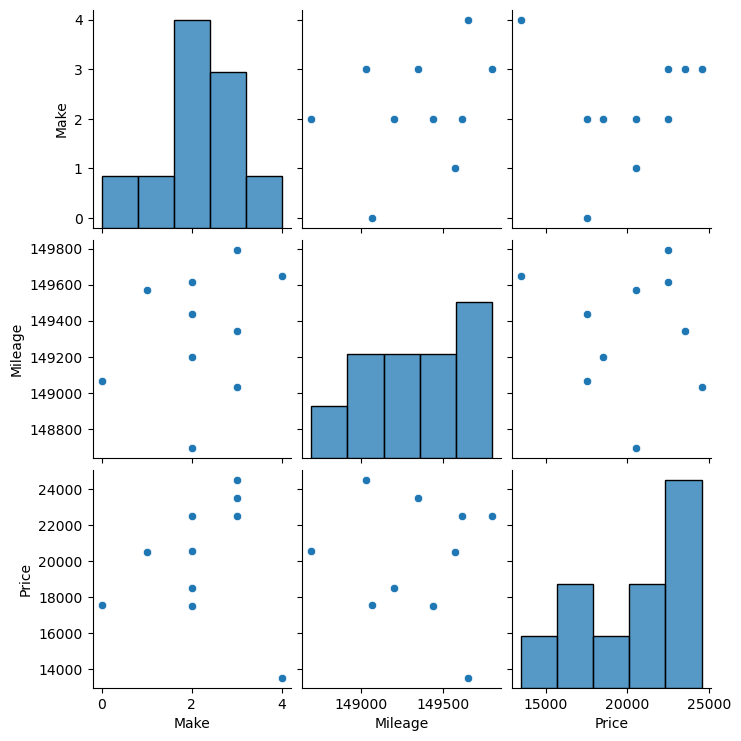

In [19]:
#Pair plot of top 10 cars based on Mileage
top5_data_copy = data_copy.sort_values(by = 'Mileage', ascending=False)[:10]
sns.pairplot(top5_data_copy)
plt.show()

The above pairplot displays information about the top 10 cars based on its Mileage and it relationship with other factors like Make (Brand) and Price.

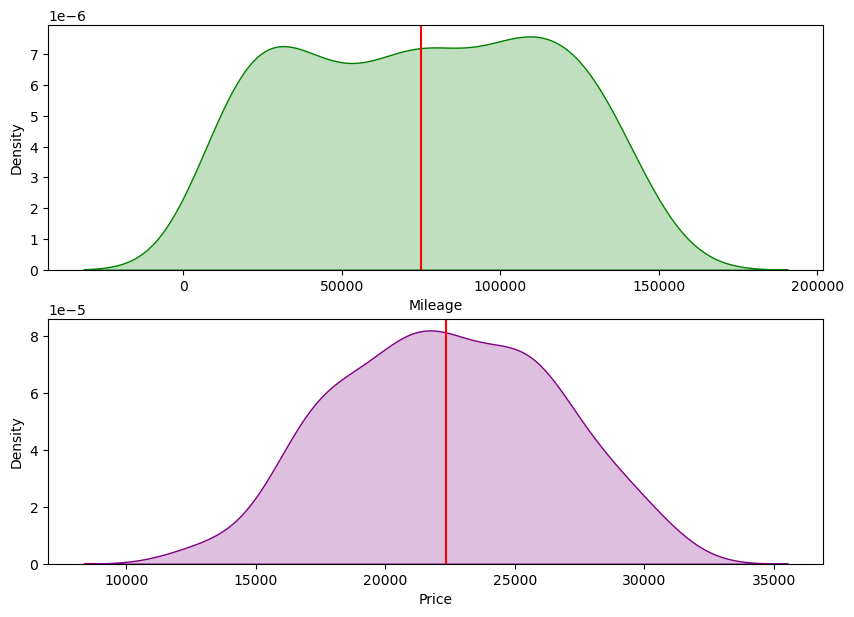

In [20]:
ford = data[data['Make'] == 'Ford']
fig = plt.figure(figsize=(10,7))

fig.add_subplot(2,1,1)
sns.kdeplot(ford['Mileage'], color = 'Green', fill=True)
plt.axvline(x = ford['Mileage'].mean(), color = 'Red')

fig.add_subplot(2,1,2)
sns.kdeplot(ford['Price'], color = 'Purple', fill=True)
plt.axvline(x = ford['Price'].mean(), color = 'Red')
plt.show()

The above Kernel Density Estimate plot represents the distribution of observations in the dataset.

The vertical red line in both the graphs indicates the mean value.

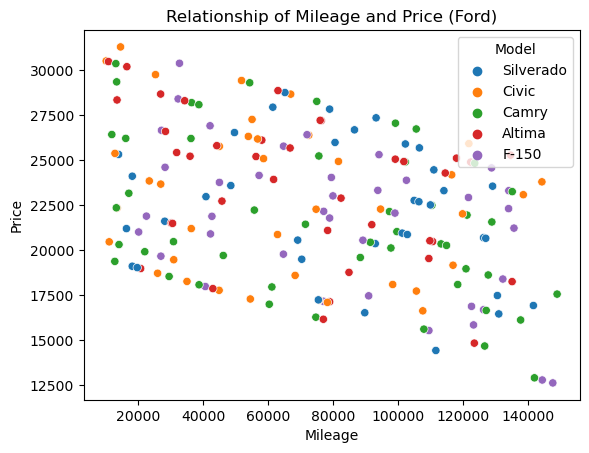

In [21]:
sns.scatterplot(data = data, x = data[data['Make'] == 'Ford']['Mileage'], y = data[data['Make'] == 'Ford']['Price'], hue = data[data['Make'] == 'Ford']['Model'])
plt.title('Relationship of Mileage and Price (Ford)')
plt.show()

The above scatter plot represents the information about Mileage that Ford offers in its various Models with respect to its price.

It is observed that as the Mileage value decrease, the Price value increases, i.e., Lower the Mileage, higher the price.